In [10]:
import numpy as np
import pandas as pd
import pickle

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
from spike_train_utils import simulate_hawkes_thinning
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [17]:
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [52]:
save_fig = True

In [7]:
rate_hz     = [5, 10]
tau_ms      = 100
alpha       = 0.4 
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz[trial],
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains.append(spikes)

fr 4.7
fr 10.0


In [6]:
rate_hz     = 5
tau_ms      = [100,200]
alpha       = 0.4
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains_taus = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms[trial],
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains_taus.append(spikes)

fr 4.7
fr 4.9


In [5]:
rate_hz     = 5
tau_ms      = 100
alpha       = [0.4, 0.8] 
duration_ms = 10*1000    

# generate
num_trials = 2
all_spike_trains_alpha = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha[trial],
        duration_ms_=duration_ms,
        seed_=5  # different seed per trial
    )
    print(f'fr {len(spikes)/10}')
    all_spike_trains_alpha.append(spikes)

fr 4.7
fr 4.7


### Plots

#### Raster plots of spike trains

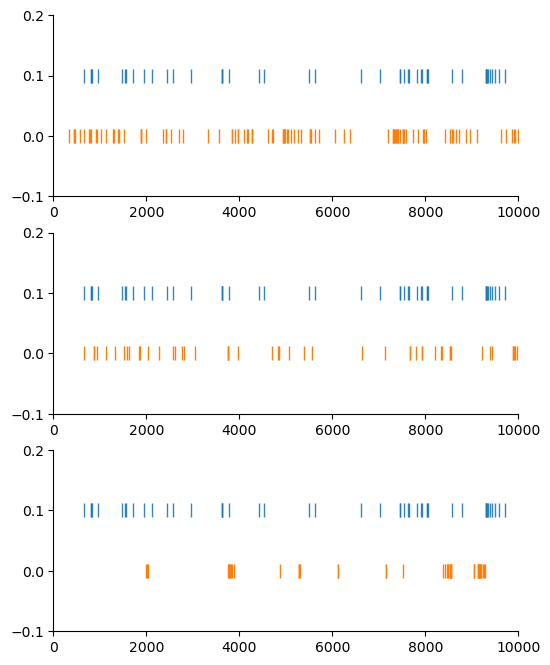

In [8]:
fig, axes = plt.subplots(3,1, figsize=(6, 8))

axes[0].plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[0].plot(all_spike_trains[1], np.zeros(len(all_spike_trains[1])), '|', markersize=10, alpha=1)

axes[1].plot(all_spike_trains_taus[0], np.ones(len(all_spike_trains_taus[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[1].plot(all_spike_trains_taus[1], np.zeros(len(all_spike_trains_taus[1])), '|', markersize=10, alpha=1)

axes[2].plot(all_spike_trains_alpha[0], np.ones(len(all_spike_trains_alpha[0]))*0.1, '|', markersize=10, alpha=0.9)
axes[2].plot(all_spike_trains_alpha[1], np.zeros(len(all_spike_trains_alpha[1])), '|', markersize=10, alpha=1)

for ax in axes.flat:
    ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([0, 10000])
    
sns.despine()

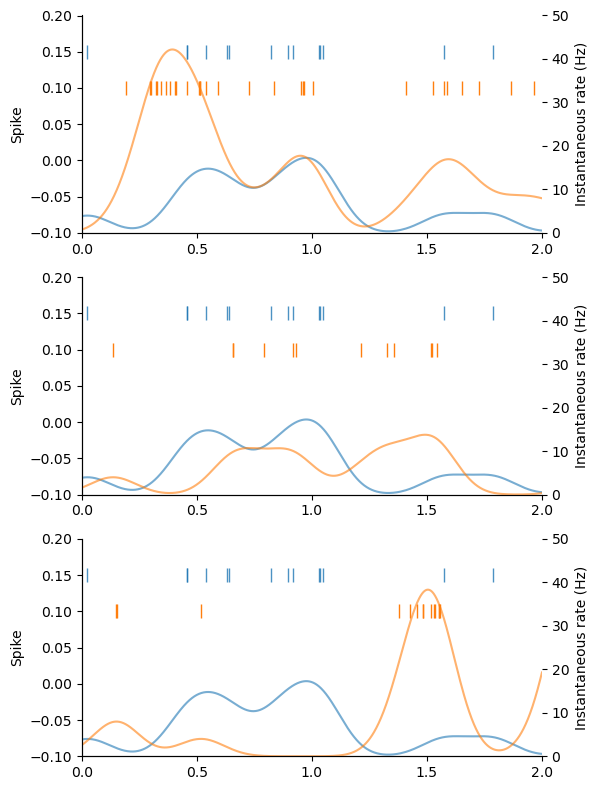

In [29]:
def smoothed_rate(spike_times, T_ms=10000, dt_ms=1, sigma_ms=100):
    # 1) bin into dt_ms-wide bins
    edges = np.arange(0, T_ms + dt_ms, dt_ms)
    counts, _ = np.histogram(spike_times, bins=edges)

    # 2) smooth with a Gaussian (sigma in number of bins)
    sigma_bins = sigma_ms / dt_ms
    smooth_counts = gaussian_filter1d(counts.astype(float), sigma=sigma_bins)

    # 3) convert to Hz: (spikes per bin) / (bin_width in s)
    dt_s = dt_ms / 1000.0
    rate_hz = smooth_counts / dt_s

    # 4) bin‐centers for plotting
    t = edges[:-1] + dt_ms/2
    return t, rate_hz

fig, axes = plt.subplots(3,1, figsize=(6, 8))

for ax, trains in zip(axes,
                      [all_spike_trains,
                       all_spike_trains_taus,
                       all_spike_trains_alpha]):
    # ---- raster ----
    ax.plot(trains[0], np.ones(len(trains[0]))*0.15,  '|', ms=10, alpha=0.8)
    ax.plot(trains[1], np.ones(len(trains[1]))*0.1,         '|', ms=10, alpha=1.0)
    ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([0, 10000])
    ax.set_ylabel('Spike')

    # ---- smoothed rate ----
    t0, r0 = smoothed_rate(trains[0])
    t1, r1 = smoothed_rate(trains[1])
    ax_rate = ax.twinx()
    ax_rate.plot(t0, r0, color='C0', alpha=0.6, label='Train 1 (Hz)')
    ax_rate.plot(t1, r1, color='C1', alpha=0.6, label='Train 2 (Hz)')
    ax_rate.set_ylim([0, 50])
    ax_rate.set_ylabel('Instantaneous rate (Hz)')

for ax in axes.flat:
   # ax.set_ylim([-0.1, 0.2])
    ax.set_xlim([7000, 9000])
    ax.set_xticks(np.linspace(7000, 9000, 5))
    ax.set_xticklabels(np.linspace(0, 2, 5))

sns.despine()
plt.tight_layout()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_params_examples_7000_9000.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_params_examples_7000_9000.svg' , bbox_inches='tight')

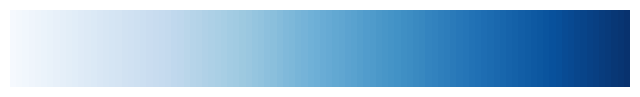

In [36]:
palette = sns.color_palette('Blues', n_colors=100)

fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([palette], aspect='auto')
ax.set_axis_off()  # Hide axes for a cleaner look
plt.show()

fig.savefig(fig_folder + 'blues_palette.svg', bbox_inches='tight')
fig.savefig(fig_folder + 'blues_palette.png', bbox_inches='tight')

#### Schematic for making trials

In [46]:
rate_hz     = 5
tau_ms      = 100
alpha       = 0.4 
duration_ms = 30*1000    

# generate
num_trials = 3
all_spike_trains = []
for trial in range(num_trials):
    spikes = simulate_hawkes_thinning(
        fr_hz_=rate_hz,
        tau_ms_=tau_ms,
        alpha_=alpha,
        duration_ms_=duration_ms,
        seed_=trial  # different seed per trial
    )
    print(f'fr {len(spikes)/30}')
    all_spike_trains.append(spikes)

fr 4.0
fr 5.5
fr 5.766666666666667


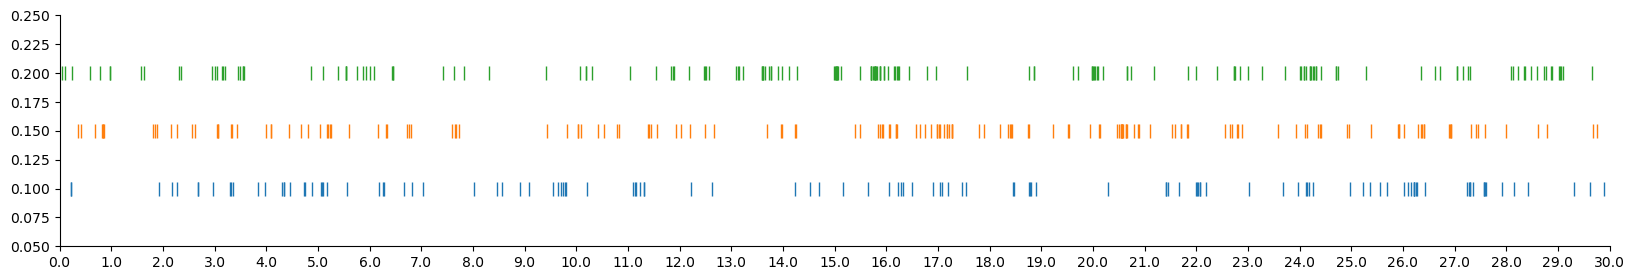

In [53]:
fig, axes = plt.subplots(1,1, figsize=(20, 3))

axes.plot(all_spike_trains[0], np.ones(len(all_spike_trains[0]))*0.1, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[1], np.ones(len(all_spike_trains[1]))*0.15, '|', markersize=10, alpha=1)
axes.plot(all_spike_trains[2], np.ones(len(all_spike_trains[2]))*0.2, '|', markersize=10, alpha=1)

axes.set_ylim([0.05, 0.25])
#axes.set_xlim([0, 10000])
axes.set_xlim([0, 30000])
axes.set_xticks(np.linspace(0, 30000, 31))
axes.set_xticklabels(np.linspace(0, 30, 31))

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'data_gen_spike_trains_30sec.svg' , bbox_inches='tight')